# Clustering

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm

In [35]:
FPKM = pd.read_csv("all_annotated.csv")
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [36]:
FPKM["median"] = FPKM.iloc[:, 3: ].median(axis = 1)
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.06420
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [37]:
FPKM_filter = FPKM[FPKM["median"]>0]
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,4.087385
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,14.832370
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,52.928318
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,72.815582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,11.151757,0.391747,4.240487,93.574127,87.244370,22.549498,73.099991,56.537510,41.339439,0.285725,22.376423,93.960289,269.186951,22.976255,32.563301,218.131927,41.339439
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.916695
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,222.375244
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1651.994141


In [38]:
np.log2(FPKM_filter.iloc[:, 3:-1] + 1)

,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070
8,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147
9,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434
10,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614
11,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656
34663,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412
34665,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634
34667,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072


In [39]:
FPKM_filter.columns

Index(['t_name', 'gene_name', 'male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D', 'median'],
      dtype='object')

In [40]:
for i in ['male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D']:
    FPKM_filter.loc[:, i] = np.log2(FPKM_filter.loc[:, i] + 1)

/Users/cmdb/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [90]:
FPKM_filter.columns[2:-1]

Index(['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B',
       'male_14C', 'male_14D', 'female_10', 'female_11', 'female_12',
       'female_13', 'female_14A', 'female_14B', 'female_14C', 'female_14D'],
      dtype='object')

In [87]:
FPKM_filter_array = FPKM_filter.iloc[:, 2:-1].to_numpy().T
FPKM_filter_array

array([[ 4.6271728 ,  3.58462259,  4.32681947, ...,  4.71201055,
        11.19248592,  1.59033805],
       [ 3.69686418,  0.        ,  0.        , ...,  0.71231404,
         5.13258445,  0.        ],
       [ 4.44410369,  0.        ,  3.98480533, ...,  4.47775755,
         9.85890082,  3.16898486],
       ...,
       [ 4.5779234 ,  2.34692428,  3.07600746, ...,  4.4996401 ,
         8.82106733,  0.8764529 ],
       [ 3.93830612,  0.        ,  3.0616314 , ...,  6.53763954,
         9.43715137,  1.10550846],
       [ 4.18607025,  4.71614708,  4.57243412, ...,  9.41463427,
        12.15407192,  1.57817068]])

In [88]:
Z = linkage(FPKM_filter_array)
Z.shape

(15, 4)

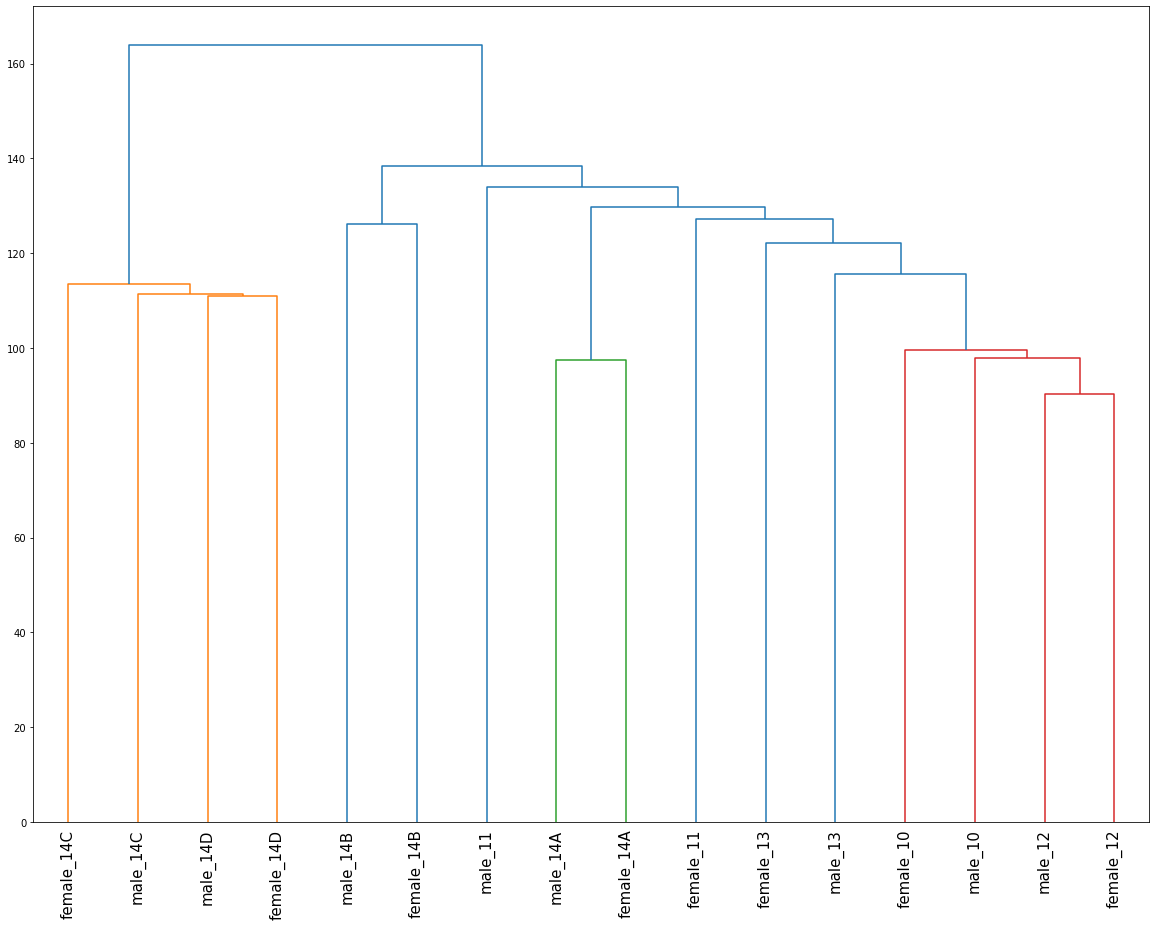

In [100]:
plt.figure(figsize=(20, 15))
dn = dendrogram(Z, 
                labels = FPKM_filter.columns[2:-1],
                leaf_rotation=90,
                leaf_font_size=15,
                )
plt.show()

# Differential expression

In [101]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141


In [108]:
male_FPKM = FPKM_filter.iloc[:, 2:10]
male_FPKM
female_FPKM = FPKM_filter.iloc[:, 10:-1]

In [112]:
female_FPKM.rename(columns={"female_10": "10", "female_11": "11", "female_12": "12", "female_13": "13", 
                            "female_14A": "14", "female_14B": "14", "female_14C": "14", "female_14D": "1d"}, inplace=True)

In [139]:
male_FPKM.rename(columns={"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
                            "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14}, inplace=True)

In [140]:
male_FPKM

,10,11,12,13,14,14,14,14
3,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793
8,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051
9,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596
10,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532
11,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625
...,...,...,...,...,...,...,...,...
34658,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431
34663,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232
34665,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325
34667,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866


In [147]:
pvalues_male = []
X = np.array(male_FPKM.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(male_FPKM.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_male.append(model.pvalues)

In [148]:
pvalues_male

[array([0.03020341, 0.95492924]),
 array([0.81810366, 0.6144083 ]),
 array([0.9247016, 0.4288173]),
 array([0.21096457, 0.04711707]),
 array([0.28080796, 0.57838479]),
 array([0.13011936, 0.03144662]),
 array([0.95423061, 0.78082633]),
 array([0.49856241, 0.7243766 ]),
 array([0.03448036, 0.01912422]),
 array([0.11086195, 0.23134304]),
 array([0.02445843, 0.05306913]),
 array([0.01184764, 0.66545477]),
 array([0.09622357, 0.23303256]),
 array([0.00860682, 0.00211589]),
 array([0.00122053, 0.00053569]),
 array([0.00040526, 0.01515981]),
 array([0.26509971, 0.43187723]),
 array([0.48480312, 0.71744243]),
 array([0.00603286, 0.23229001]),
 array([0.79575286, 0.33061728]),
 array([0.54019431, 0.17993549]),
 array([0.7158166 , 0.26736791]),
 array([0.24299453, 0.63545607]),
 array([2.85774672e-04, 9.65063711e-05]),
 array([0.03269534, 0.07389709]),
 array([0.03271633, 0.07420613]),
 array([0.16297361, 0.29041671]),
 array([0.02569247, 0.71424795]),
 array([0.02741725, 0.71479784]),
 array([